<a href="https://colab.research.google.com/github/Ell-neto/Redes_Neurais/blob/main/Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
import torchvision
from torchvision import datasets, transforms

Classificação

In [2]:
MNIST = torchvision.datasets.MNIST('.',train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
dados, rotulo = MNIST[0]
print(dados.size(), rotulo)

torch.Size([1, 28, 28]) 7


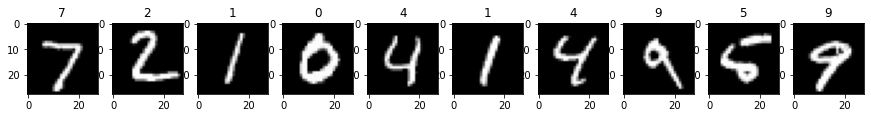

In [4]:
fig, axs = plt.subplots(1, 10, figsize=(15,4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0], cmap='gray')
  axs[i].set_title(str(rotulo))

Detecção

In [5]:
VOC = datasets.VOCDetection('.', image_set='train', download=True, transform=transforms.ToTensor())

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


torch.Size([3, 442, 500])


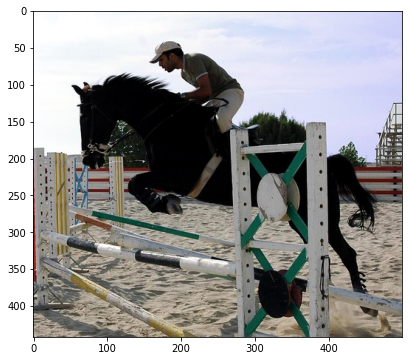

In [6]:
dado, rotulo = VOC[0]

print(dado.size())
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

In [7]:
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

In [8]:
#plot bouding box

Segmentação

In [9]:
VOCs = datasets.VOCSegmentation('.', year='2012', image_set='val', download=True, transform=transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [10]:
VOCs = datasets.VOCSegmentation('.', year='2012', image_set='val', download=False, transform=transforms.ToTensor(), target_transform=transforms.ToTensor())

In [11]:
dado, rotulo = VOCs[0]

print(dado.size(), rotulo.size())

torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


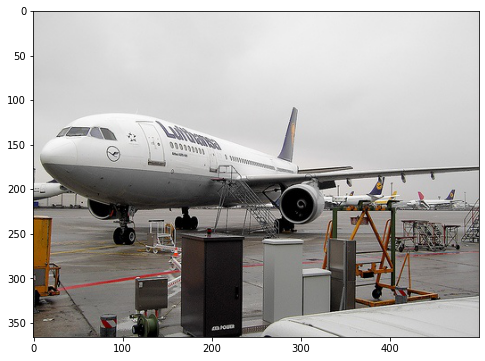

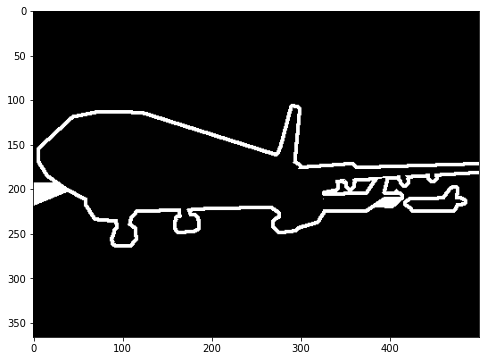

In [12]:
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

plt.figure(figsize=(8,6))
plt.imshow(rotulo[0], cmap='gray')

## Convolução 1D

In [13]:
from scipy.signal import convolve

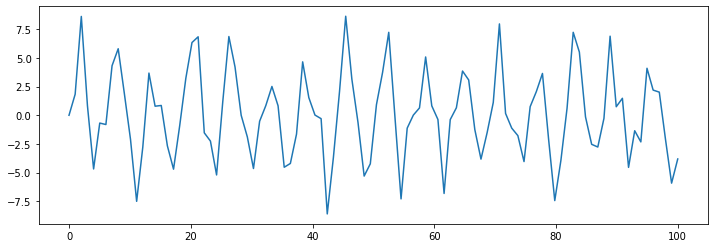

In [14]:
x = np.linspace(0, 100, 100)
y = 10*np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12,4))
plt.plot(x,y)

In [15]:
def show(valores, title):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=10)
  plt.yticks([])

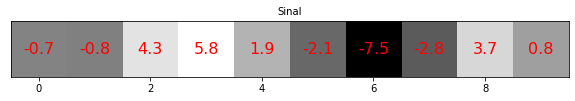

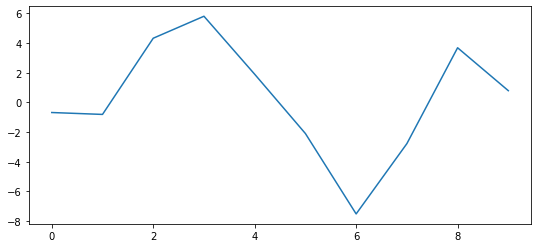

In [16]:
sinal = y[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(9,4))
plt.plot(sinal)

Kernel

É um filtro convolucional.

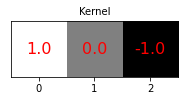

In [17]:
kernel = np.asarray([1, 0, -1])
show(kernel, 'Kernel')

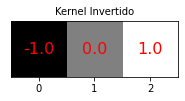

In [18]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

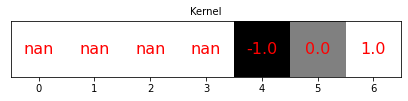

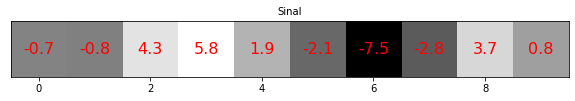

In [19]:
u = 4
deslocamento = [float('nan')]*u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel')
show(sinal, 'Sinal')

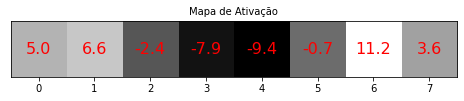

In [20]:
ativacao = convolve(sinal, kernel, mode='valid')
show(ativacao, 'Mapa de Ativação')

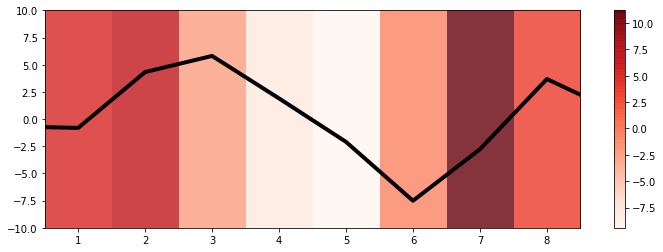

In [21]:
plt.figure(figsize=(12,4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

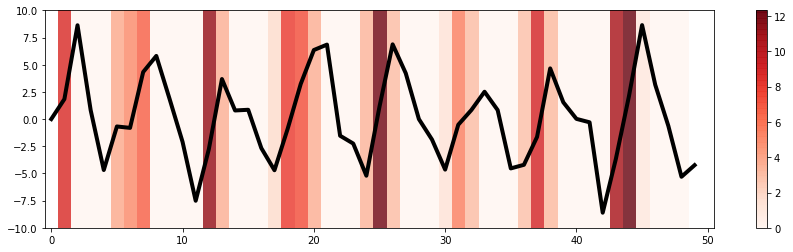

In [22]:
ativacao = convolve(y[:50], kernel, mode='valid')
ativacao[ativacao<0] = 0

plt.figure(figsize=(15,4))
plt.plot(y[:50], color='k', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

## Convolução 2D

In [23]:
from skimage import io, color, transform, data

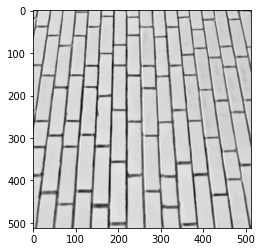

In [24]:
img = data.brick()
plt.imshow(img, cmap='Greys')

In [25]:
def show2d(valores, title):
  plt.figure(figsize=(len(valores), len(valores)))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

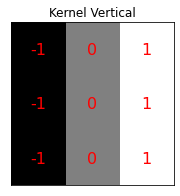

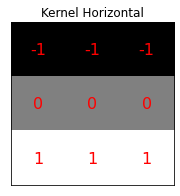

In [26]:
kernel_v = [ [-1, 0 ,1], [-1, 0 ,1], [-1, 0 ,1] ]

show2d(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1 ,-1], [0, 0 ,0], [1, 1 ,1] ]

show2d(kernel_h, 'Kernel Horizontal')

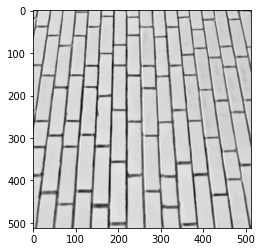

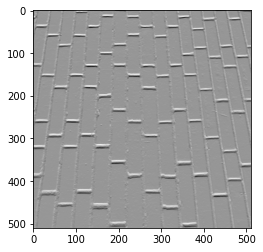

In [27]:
mapa_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_caracteristicas, cmap='Greys')

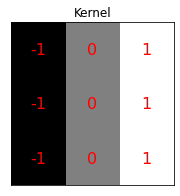

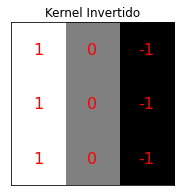

In [29]:
show2d(kernel_v, 'Kernel')
show2d(np.flip(kernel_v), 'Kernel Invertido')

Filtros Convolucionais

In [30]:
%matplotlib inline

In [31]:
def show2dnovo(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15,5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=16, color='red', ha='center', va='center')

In [32]:
!wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

--2022-08-17 22:32:25--  https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.217.110.214
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.217.110.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82709 (81K) [image/jpeg]
Saving to: ‘GUI.jpg’

GUI.jpg             100%[===================>]  80.77K  --.-KB/s    in 0.06s   

2022-08-17 22:32:25 (1.35 MB/s) - ‘GUI.jpg’ saved [82709/82709]



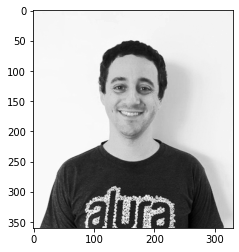

In [33]:
img = io.imread('GUI.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

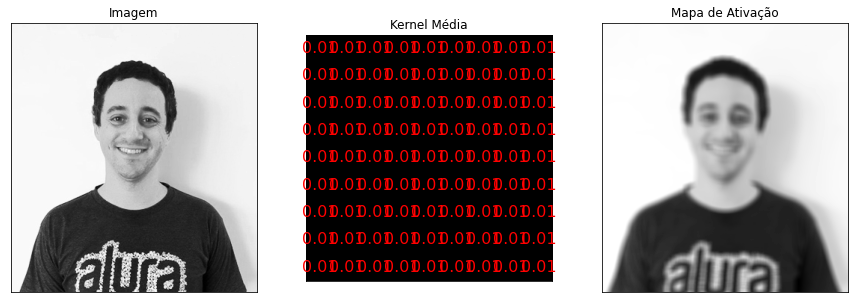

In [34]:
### MEAN

kernel_media = np.zeros((9,9)) #np.zeros((3,3))
kernel_media[:] = 1.0/(9**2) #1.0/(3**2)

resultado = convolve(img, kernel_media, mode = 'valid')
show2dnovo(img, kernel_media, resultado, 'Kernel Média')

Filtro de Sobel

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


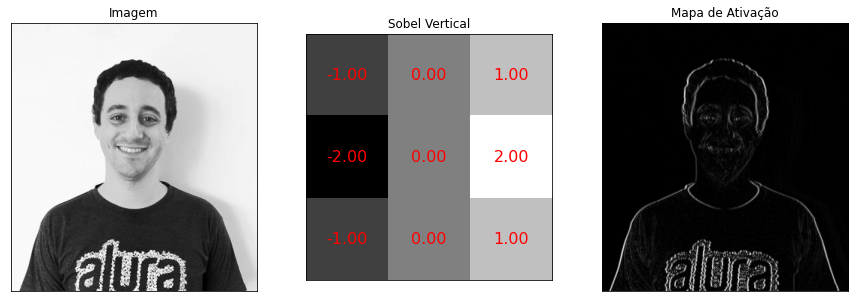

In [35]:
## Sobel Vertical
sobel_v = np.zeros((3,3))
sobel_v[:,0] = -1
sobel_v[:,2] = 1
sobel_v[1, [0,2]] = [-2,2]
print(sobel_v)

resultado = convolve(img, sobel_v, mode = 'valid')
show2dnovo(img, sobel_v, np.abs(resultado), 'Sobel Vertical')

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


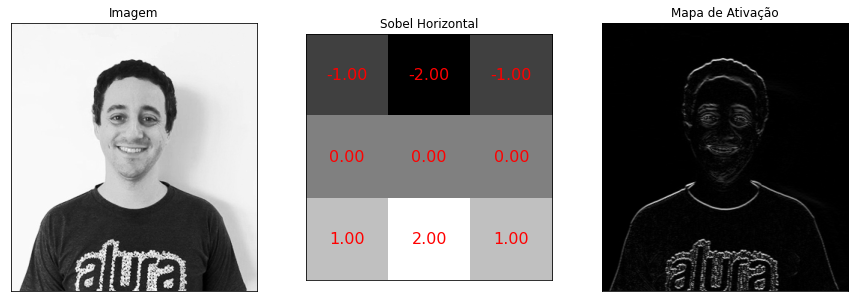

In [36]:
## Sobel Hori
sobel_h = np.zeros((3,3))
sobel_h[0,:] = -1
sobel_h[2,:] = 1
sobel_h[[0,2], 1] = [-2,2]
print(sobel_h)

resultado = convolve(img, sobel_h, mode = 'valid')
show2dnovo(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')

Laplace

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


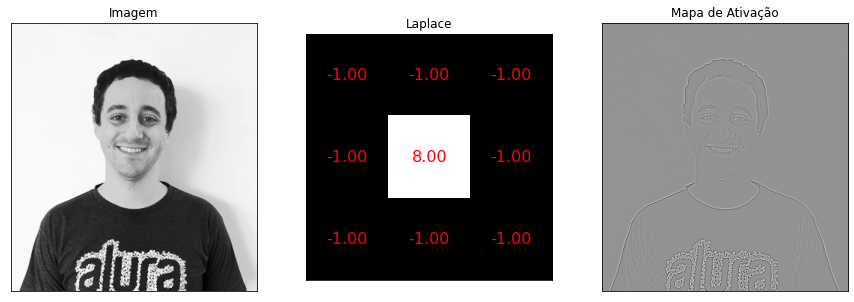

In [37]:
laplace = np.ones((3,3))*-1
laplace[1,1] = 8
print(laplace)

resultado = convolve(img, laplace, mode = 'valid')
show2dnovo(img, laplace, resultado, 'Laplace')  #pode colcoar o abs(resultado)

Convolução e Padrões Complexos

In [38]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg

--2022-08-17 22:32:27--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0nrix9eknyybuqk/image_2007_000032.jpg [following]
--2022-08-17 22:32:27--  https://www.dropbox.com/s/raw/0nrix9eknyybuqk/image_2007_000032.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3130b3287832a72f4ade8d6b59.dl.dropboxusercontent.com/cd/0/inline/BrNS7O_RPEQiEoUUQkEE9h3ZPZflr5zAwdMrtBj1ZJfZTjpvhUKhMWV7t02Xw8JFBnK_0jLziHRgDnk39OcuN4Ax8KF_KD6eyHQn2VKlYx424oQ6wGW_ZX31opheeAn8iQMuZG3fAeE_IZa5YXZbvQrAR-Z7gb14qDS2tcNeapD0iQ/file# [following]
--2022-08-17 22:32:28--  https://uc3130b3287832a72f4ade8d6b59.dl.dropboxusercontent.com/cd/0/inline/BrNS7O_RPEQiEoUUQkEE9h3ZPZflr5zAwdMr

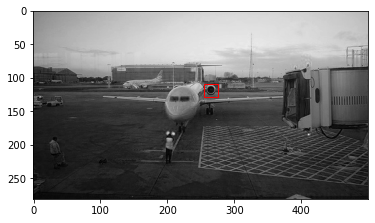

In [39]:
import matplotlib.patches as patches

img = io.imread('plane.jpg')
img = img[:,:,0]  #todas as linhas, todas as colunas, e so 1 canal
retangulo = [109, 129, 255, 275]

fix, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

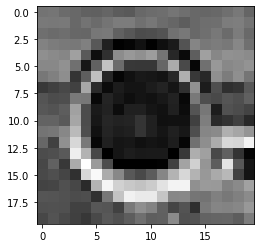

In [40]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
patch = patch - patch.mean()
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

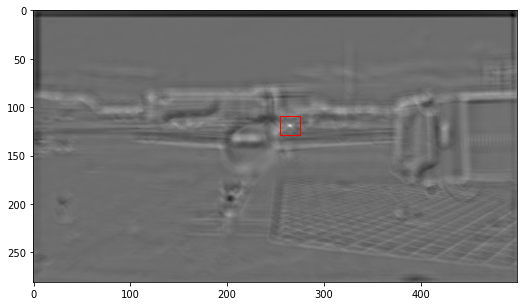

In [41]:
resultado = convolve(img, patch, mode='same')

fix, ax = plt.subplots(figsize=(15,5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

## Camadas Convolucional

In [42]:
from torch import nn

from skimage import data

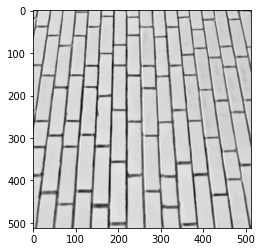

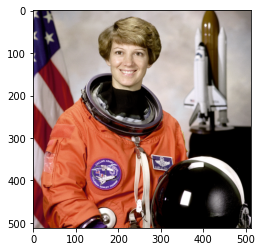

In [43]:
pb = data.brick()
rgb = data.astronaut()

plt.imshow(pb, cmap='Greys')
plt.figure()
plt.imshow(rgb)

In [44]:
conv = nn.Conv2d(1, 16, 3, padding=1)

pb_tns = torch.Tensor(pb)
pb_tns = pb_tns.view(1, 1, pb_tns.size(0), pb_tns.size(1)) #altera as dimensões dos tensores
print(pb_tns.size())

torch.Size([1, 1, 512, 512])


In [45]:
mapa_ativacao = conv(pb_tns)
print(mapa_ativacao.size())

torch.Size([1, 16, 512, 512])


In [46]:
#para a imagem colorida

conv = nn.Conv2d(3, 16, 3, padding=2)

rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0) #(canal, altura, largura)
print(rgb_tns.size())

torch.Size([1, 3, 512, 512])


In [47]:
mapa_ativacao_cor = conv(rgb_tns)
print(mapa_ativacao_cor.size())

torch.Size([1, 16, 514, 514])


## Pooling

In [48]:
tns = torch.FloatTensor([[ [1,2,3], [4,5,6], [7,8,9]]])

pool = nn.MaxPool2d(2,stride=1)
saida = pool(tns)

print(tns.size())
print(tns)
print(saida.size())
print(saida)

torch.Size([1, 3, 3])
tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])
torch.Size([1, 2, 2])
tensor([[[5., 6.],
         [8., 9.]]])


In [49]:
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)

rgb = data.astronaut()
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2,0,1).unsqueeze(0)
mapa_ativacao = conv(rgb_tns)
print('Feature Map:', mapa_ativacao.shape)

Feature Map: torch.Size([1, 16, 512, 512])


In [59]:
pool = nn.MaxPool2d(kernel_size=2)
saida = pool(mapa_ativacao)
print(saida.size())

torch.Size([1, 16, 256, 256])


Batch Normalization

In [53]:
from torch.nn.modules.batchnorm import BatchNorm2d

blococonv = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=10)
)

print(blococonv)

print(rgb_tns.size())
saida = blococonv(rgb_tns)
print(saida.size())

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=10, stride=10, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 3, 512, 512])
torch.Size([1, 32, 51, 51])


## Treino do zero

Fluxo de Treinamento

In [68]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from torch import optim

import time, os

In [61]:
# Configurando hiperparâmetros.
args = {
    'epoch_num': 150,     # Número de épocas.
    'lr': 1e-3,           # Taxa de aprendizado.
    'weight_decay': 1e-3, # Penalidade L2 (Regularização).
    'batch_size': 50,     # Tamanho do batch.
}

In [63]:
data_transform = transforms.Compose([
                                     transforms.Resize(32),
                                     transforms.ToTensor(),])

train_set = datasets.CIFAR10('.', 
                      train=True, 
                      transform=data_transform, 
                      download=True)

test_set = datasets.CIFAR10('.', 
                      train=False, 
                      transform=data_transform, 
                      download=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


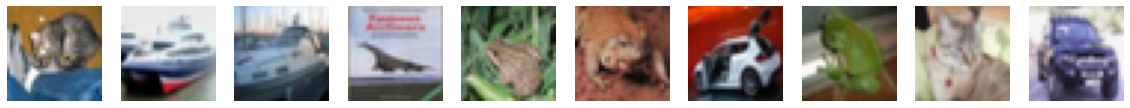

In [64]:
fig, axs = plt.subplots(1,10, figsize=(20, 2))
for i in range(10):
  data, label = test_set[i]
  axs[i].imshow(data.permute((1,2,0)))
  axs[i].axis('off')

In [65]:
train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True)

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True)

LeNet 5

In [66]:
net = nn.Sequential(
    #entrada (batch, 3, 32, 32) saida (batch, 6, 28, 28)
    nn.Conv2d(3, 6, kernel_size=5),
    nn.BatchNorm2d(6),
    nn.Tanh(), #Ativação especifica da LeNet
    #entrada (batch, 3, 28, 28) saida (batch, 6, 14, 14)
    nn.AvgPool2d(kernel_size=2),  # Pooling especifico da LeNet

    #entrada (batch, 6, 14, 14) saida (batch, 16, 10, 10)
    nn.Conv2d(6, 16, kernel_size=5),
    nn.BatchNorm2d(16),
    nn.Tanh(), 
    #entrada (batch, 16, 10, 10) saida (batch, 16, 5, 5)
    nn.AvgPool2d(kernel_size=2),  

    #entrada (batch, 16, 5, 5) saida (batch, 120, 1, 1)
    nn.Conv2d(16, 120, kernel_size=5),
    nn.BatchNorm2d(120),
    nn.Tanh(), 
    nn.Flatten(),

    #entrada (batch, N=120*1*1)  #saida(b, 84)
    nn.Linear(120, 84),
    nn.Tanh(),
    #entrada(b, 84)  saida(b,10)
    nn.Linear(84,10)
)

print(net)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Tanh()
  (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (9): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Tanh()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): Tanh()
  (14): Linear(in_features=84, out_features=10, bias=True)
)


* **Função de perda**, que vai avaliar a qualidade da performance da rede a cada passo de treinamento;
* **Otimizador**, que a partir da função de perda vai definir a melhor forma de atualizar os pesos.

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

Relembrando o passo a passo do fluxo de treinamento:

* Iterar nas épocas
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* Zerar o gradiente do otimizador
* Cálculo do gradiente e atualização dos pesos

Para acompanhar a convergência do seu modelo (e garantir que tudo foi feito certinho), ao final de cada época podemos imprimir a média e o desvio padrão das perdas de cada iteração.

In [70]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()
  
  start = time.time()
  
  epoch_loss  = []
  pred_list, rotulo_list = [], []
  for batch in train_loader:
    
    dado, rotulo = batch
    
    # Forward
    ypred = net(dado)
    loss = criterion(ypred, rotulo)
    epoch_loss.append(loss.cpu().data)

    _, pred = torch.max(ypred, axis=1)
    pred_list.append(pred.cpu().numpy())
    rotulo_list.append(rotulo.cpu().numpy())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)
  
  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))
  
  return epoch_loss.mean()
   

Validação

Para essa etapa, o PyTorch oferece dois artifícios:
* ```model.eval()```: Impacta no *forward* da rede, informando as camadas caso seu comportamento mude entre fluxos (ex: dropout).
* ```with torch.no_grad()```: Gerenciador de contexto que desabilita o cálculo e armazenamento de gradientes (economia de tempo e memória). Todo o código de validação deve ser executado dentro desse contexto.

In [71]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []
  pred_list, rotulo_list = [], []
  with torch.no_grad(): 
    for batch in test_loader:

      dado, rotulo = batch

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      _, pred = torch.max(ypred, axis=1)
      pred_list.append(pred.cpu().numpy())
      rotulo_list.append(rotulo.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)
  
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))
  
  return epoch_loss.mean()
    

In [72]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):
  
  # Train
  train_losses.append(train(train_loader, net, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 1.6675 +/- 0.1867, Acc: 40.86, Time: 28.65
********** Validate **********
Epoch 0, Loss: 1.5265 +/- 0.1309, Acc: 45.84, Time: 3.15

#################### Train ####################
Epoch 1, Loss: 1.4354 +/- 0.1441, Acc: 48.91, Time: 26.53
********** Validate **********
Epoch 1, Loss: 1.4014 +/- 0.1476, Acc: 49.64, Time: 3.13

#################### Train ####################
Epoch 2, Loss: 1.3494 +/- 0.1503, Acc: 51.85, Time: 27.51
********** Validate **********
Epoch 2, Loss: 1.3045 +/- 0.1376, Acc: 53.45, Time: 3.09

#################### Train ####################
Epoch 3, Loss: 1.3004 +/- 0.1496, Acc: 53.80, Time: 29.88
********** Validate **********
Epoch 3, Loss: 1.2583 +/- 0.1423, Acc: 54.85, Time: 4.09

#################### Train ####################
Epoch 4, Loss: 1.2599 +/- 0.1460, Acc: 55.16, Time: 26.85
********** Validate **********
Epoch 4, Loss: 1.2644 +/- 0.1306, Acc: 54.99, Time: 3.21

#################### Trai

KeyboardInterrupt: ignored

Lembrando que o código acima foi parado por conta da quantidade de epocas...